In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import pandas as pd

from itertools import product

from Code.Visualization import plot_grid2d, plot_grid3d, plot_gsmaps
from Code.util import *

from scipy.stats import ttest_ind

import glob

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['text.usetex'] = False
MM = 1/25.4

In [2]:
def autocorr_radial3d(ac, rmax, method='mean'):
    radius = int(np.floor(len(ac)/2))
    x = np.arange(-radius, radius+1)
    x = np.stack(np.meshgrid(x, x, x, indexing='ij'), axis=-1)

    corr = np.zeros(rmax)
    corr[0] = ac[radius, radius, radius] # Center

    for r in range(1, rmax):
        idxi = x[..., 0]**2 + x[..., 1]**2 + x[..., 2]**2 > (r-1)**2
        idxo = x[..., 0]**2 + x[..., 1]**2 + x[..., 2]**2 <= r**2
        idx = idxi & idxo

        if method == 'median':
            corr[r] = np.median(ac[idx])
        elif method == 'mean':
            corr[r] = ac[idx].mean()
        elif method == 'mean_comp':
            corr[r] = ac[idx].sum() / np.sqrt(len(ac[idx])) 
        elif method == 'max':
            corr[r] = ac[idx].max()
        else: # quantile
            corr[r] = np.quantile(ac[idx], method)
    return corr

# Check Samples 

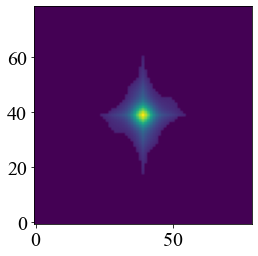

In [8]:
x = np.load('data/x/05102337.npy')
T = len(x)
bins = 40
fname = 'u_05102337_100000'
a = np.load('data/linear/a_500/%s.npy' % fname)
spikes = np.random.poisson(lam=1/(1 + np.exp(-(a - 0.8) * 30)), size=(T, 4))
f, _ = hist3d(x, spikes, bins=bins, sigma=1.75)
ac = autocorr(f, 0.1)
plt.imshow(ac[:, :, len(ac)//2, 1].T, origin='lower')

In [9]:
maps = gridness_map(ac, az_precision=100, al_precision=50)

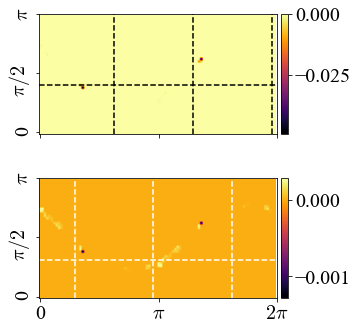

In [10]:
fig, ax = plot_gsmaps(maps)
ax[0].axhline(72 / 360 * 100, color='k', linestyle='--')
ax[1].axhline(56 / 360 * 100, color='w', linestyle='--')
for i in range(3):
    ax[0].axvline((112 + i * 120) / 360 * 100, color='k', linestyle='--')
    ax[1].axvline((52 + i * 120) / 360 * 100, color='w', linestyle='--')
ax[1].set_xlabel('')
fig.texts[0].set_visible(False)
fig.tight_layout(pad=0.5)
fig.savefig('figures/example_map_%s.pdf' % fname, transparent=True, dpi=300)

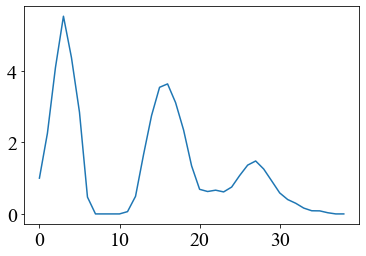

In [311]:
plt.plot(res)

# Standard Structures

In [11]:
def wrap(struct_type):
    if struct_type != 'rnd':
        points = hexagonal_structure(struct_type, 0.7, 8 * np.pi / 180)
    else:
        points = np.random.rand(100, 3)
    points_rnd = np.random.normal(loc=points, scale=0.1, size=(500, *points.shape))
    points_rnd = points_rnd.reshape(-1, 3)
    idx = (points_rnd[:, 0] > -1) & (points_rnd[:, 0] < 1) & (points_rnd[:, 1] > -1) & \
          (points_rnd[:, 1] < 1) & (points_rnd[:, 2] > -1) & (points_rnd[:, 2] < 1)
    points_rnd = points_rnd[idx]
    
    f = np.histogramdd(points_rnd, bins=40, range=((-1, 1), (-1, 1), (-1, 1)), density=False)[0]
    ac = autocorr(f, 0.1)
    return ac, f

## Planar Gridness Map

In [4]:
maps_fcc = gridness_map(wrap('fcc')[0], az_precision=100, al_precision=50)

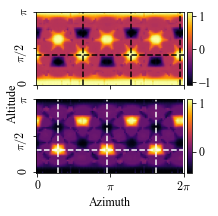

In [7]:
fig, ax = plot_gsmaps(maps_fcc)
ax[0].axhline(72 / 360 * 100, color='k', linestyle='--')
ax[1].axhline(56 / 360 * 100, color='w', linestyle='--')
for i in range(3):
    ax[0].axvline((112 + i * 120) / 360 * 100, color='k', linestyle='--')
    ax[1].axvline((52 + i * 120) / 360 * 100, color='w', linestyle='--')
    
fig.text(-0.185, 0.5, 'Altitude', ha='left', va='center', rotation='vertical')
fig.tight_layout(pad=0.1)
fig.set_size_inches(55*MM, 70*MM)
fig.savefig('figures/standard_fcc_map.pdf', transparent=True, dpi=300, pad_inches=0, bbox_inches='tight')

In [6]:
# it = range(n)
# idx_f = lambda x, t: (x[:, 2] > t*2/n-1) & (x[:, 2] < (t+1)*2/n-1)
# fig, ax = plt.subplots(1, 3, figsize=(8, 3), sharex='all', sharey='all')

# for i, l in enumerate(((0, 1), (0, 2), (1, 2))): # Planes
#     for t in it:
#         idx = idx_f(points_rnd, t)
#         ax[i].scatter(*points_rnd[idx][:, l].T, s=2)
#     ax[i].set_title(l)

In [8]:
maps_hcp = gridness_map(wrap('hcp')[0], az_precision=100, al_precision=50)

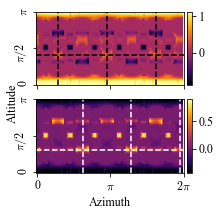

In [12]:
fig, ax = plot_gsmaps(maps_hcp)
ax[0].axhline(72 / 360 * 100, color='k', linestyle='--')
ax[1].axhline(56 / 360 * 100, color='w', linestyle='--')
for i in range(3):
    ax[0].axvline((52 + i * 120) / 360 * 100, color='k', linestyle='--')
    ax[1].axvline((112 + i * 120) / 360 * 100, color='w', linestyle='--')
    
fig.text(-0.185, 0.5, 'Altitude', ha='left', va='center', rotation='vertical')
fig.tight_layout(pad=0.1)
fig.set_size_inches(55*MM, 70*MM)
fig.savefig('figures/standard_hcp_map.pdf', transparent=True, dpi=300, pad_inches=0, bbox_inches='tight')

In [10]:
maps_col = gridness_map(wrap('col')[0], az_precision=100, al_precision=50)

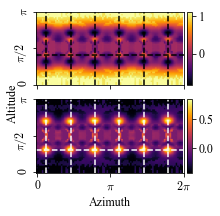

In [13]:
fig, ax = plot_gsmaps(maps_col)
ax[0].axhline(72 / 360 * 100, color='k', linestyle='--')
ax[1].axhline(56 / 360 * 100, color='w', linestyle='--')
for i in range(6):
    ax[0].axvline((22 + i * 60) / 360 * 100, color='k', linestyle='--')
    ax[1].axvline((22 + i * 60) / 360 * 100, color='w', linestyle='--')
    
fig.text(-0.185, 0.5, 'Altitude', ha='left', va='center', rotation='vertical')
fig.tight_layout(pad=0.1)
fig.set_size_inches(55*MM, 70*MM)
fig.savefig('figures/standard_col_map.pdf', transparent=True, dpi=300, pad_inches=0, bbox_inches='tight')

In [385]:
maps_rnd = gridness_map(wrap('rnd')[0], az_precision=100, al_precision=50)

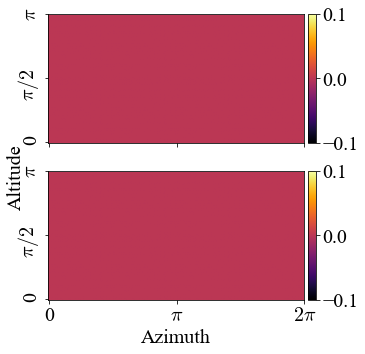

In [386]:
fig, ax = plot_gsmaps(maps_rnd)
fig.tight_layout(pad=0.5)
fig.savefig('figures/standard_rnd_map.pdf', transparent=True, dpi=300)

## Standard $\chi$ Scores

In [12]:
standard_chi = {'Type': [], 'Score Type': [], 'Score': []}
types = ('fcc', 'hcp', 'col', 'rnd')
for n in range(30):
    for i, t in enumerate(types):
        res = chi_score(wrap(t)[0])
        for j, r in enumerate(res):
            standard_chi['Type'].append(t.upper())
            standard_chi['Score Type'].append(r'$\chi_{%s}$' % types[j].upper())
            standard_chi['Score'].append(r[0])
standard_chi = pd.DataFrame(standard_chi)

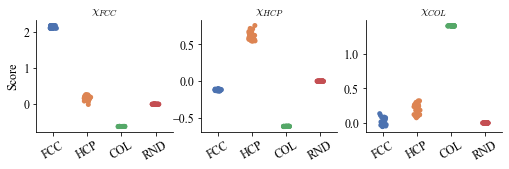

In [17]:
g = sns.catplot(x="Type", y="Score", col="Score Type", data=standard_chi, sharey=False,
                kind="strip", aspect=0.8, height=3, palette='deep')
g.set_titles("{col_name}").set_xlabels("").set_xticklabels(rotation=30, fontsize=12)
g.fig.tight_layout(pad=0.1)
g.fig.set_size_inches(175*MM, 50*MM)
g.savefig('figures/standard_chi.pdf', transparent=True, dpi=300, pad_inches=0, bbox_inches='tight')

## Standard Modified Radial Autocorrelation

In [81]:
ac_r3d = {'Type': [], 'r': [], 'ac': []}
types = ('fcc', 'hcp', 'col', 'rnd')
for n in range(30):
    for i, t in enumerate(types):
        ac = wrap(t)[0]
        res = autocorr_radial3d(ac[..., 0], len(ac)//2, method='mean_comp')
        m = res.min()
        res = (res - m) / (res.max() - m)
        ac_r3d['r'] += list(range(len(res)))
        ac_r3d['ac'] += list(res)
        ac_r3d['Type'] += [t.upper() for _ in range(len(res))]
        
ac_r3d = pd.DataFrame(ac_r3d)

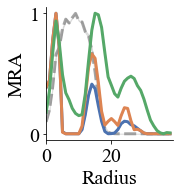

In [115]:
fig, ax = plt.subplots(1)
sns.lineplot(data=ac_r3d, x='r', y='ac', style='Type', style_order=['', 'RND'], palette='deep', ax=ax, color='grey', alpha=0.7, linewidth=3, legend=False)
sns.lineplot(data=ac_r3d, x='r', y='ac', hue='Type', hue_order=['HCP', 'FCC', 'COL'], palette='deep', ax=ax, linewidth=3, legend=False)
ax.set_xlim([0, 39])
ax.set_xticks([0, 20])
ax.set_yticks([0, 1])
ax.set_xlabel('Radius')
ax.set_ylabel('MRA')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.legend(title='', fontsize=14, frameon=False, labelspacing=0.2, handletextpad=0.2, handlelength=0.5)
fig.set_size_inches(60*MM, 65*MM)
fig.tight_layout(pad=0.1)
fig.savefig('figures/standard_r3d.pdf', transparent=True, dpi=300, pad_inches=0)

## Standard Inter-field Distance

In [19]:
std_dist = {'Type': [], 'dist': []}

for t in ('fcc', 'hcp'):
    points = hexagonal_structure(t, 0.7, 8 * np.pi / 180)
    for i in range(len(points)):
        for j in range(i+1, len(points)):
            std_dist['Type'].append(t.upper())
            std_dist['dist'].append(np.linalg.norm(points[i] - points[j]))
            
for _ in range(30):
    points = np.random.rand(100, 3)
    for i in range(len(points)):
        for j in range(i+1, len(points)):
            std_dist['Type'].append('RND')
            std_dist['dist'].append(np.linalg.norm(points[i] - points[j]))
std_dist = pd.DataFrame(std_dist)

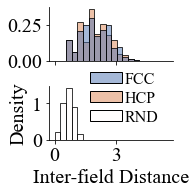

In [114]:
fig, ax = plt.subplots(2, sharex='all', figsize=(3, 3))
# The range is determined approximately by the maximum possible distance in the cube
sns.histplot(data=std_dist[std_dist['Type'] != 'RND'], x='dist', hue='Type', bins=20, binrange=(0, 5.5), stat='density', ax=ax[0], palette='deep')
sns.histplot(data=std_dist[std_dist['Type'] == 'RND'], x='dist', hue='Type', bins=20, binrange=(0, 5.5), stat='density', palette='seismic', ax=ax[1])
ax[1].set_xlabel('Inter-field Distance')
ax[0].set_ylabel('')
ax[1].set_xticks([0, 3])

old_legend = ax[0].legend_
handles = old_legend.legendHandles + ax[1].legend_.legendHandles
labels = [t.get_text() for t in old_legend.get_texts()] + ['RND']
title = old_legend.get_title().get_text()
ax[0].legend_ = None
ax[1].legend(handles, labels, title='', fontsize=16, frameon=False, labelspacing=0.2, handletextpad=0.2)

for i in (0, 1):
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

fig.set_size_inches(60*MM, 65*MM)
fig.tight_layout(pad=0.1)
fig.savefig('figures/standard_ifd.pdf', transparent=True, dpi=300, pad_inches=0, bbox_inches='tight')

In [957]:
rnd_sinfo = np.zeros(50)
rnd_sidx = np.zeros(50)

p = np.ones((40, 40, 40)) # Subject to change with bin size
p /= p.sum()

for i in range(50):
    f = np.histogramdd(np.random.rand(50000, 3), bins=40, 
                       range=((-1, 1), (-1, 1), (-1, 1)), density=False)[0]
    f = gaussian_filter(f, sigma=1.75, mode='constant')
    f = f[..., None]
    
    rnd_sinfo[i] = spatial_info(p, f)
    rnd_sidx[i] = sparsity_idx(p, f)

std_sinfo = np.zeros(4)
std_sidx = np.zeros(4)
for i, t in enumerate(('fcc', 'hcp', 'col', 'rnd')):
    f = wrap(t)[1][..., None]
    
    std_sinfo[i] = spatial_info(p, f)
    std_sidx[i] = sparsity_idx(p, f)

std_sinfo_z = (std_sinfo - rnd_sinfo.mean()) / rnd_sinfo.std()
std_sidx_z = (std_sidx - rnd_sidx.mean()) / rnd_sidx.std()

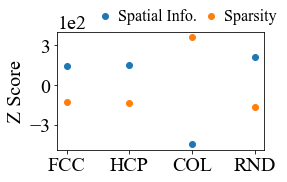

In [1157]:
idx = np.arange(4)
fig, ax = plt.subplots(figsize=(4, 2.5))
ax.scatter(idx, std_sinfo_z, label='Spatial Info.')
ax.scatter(idx, std_sidx_z, label='Sparsity')
ax.set_xticks([0, 1, 2, 3])
ax.set_yticks([300, 0, -300])
ax.set_ylabel('Z Score')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.set_xticklabels(['FCC', 'HCP', 'COL', 'RND'])
fig.legend(loc=(0.3, 0.83), ncol=2, frameon=False, 
           columnspacing=0.1, fontsize=16, labelspacing=0, handletextpad=0.1, handlelength=1.5)
fig.tight_layout(pad=0.5)
fig.savefig('figures/standard_si.pdf', transparent=True, dpi=300)

# Samples (Plane-based)

## Spatial Information and Sparsity Index

In [3]:
change_ints = (1, 5, 1e1, 5e1, 1e2, 5e2, 1e3, 5e3, 1e4, 5e4, 1e5)
col = ['tid', 'nid', 'kappa', 'tau', 'sidx', 'sinfo', 'sidxz', 'sinfoz']
df_si = pd.DataFrame(index=np.arange(8*4*5*len(change_ints)), columns=col)

bins = 40
count = 0
for _, xfname in enumerate(glob.glob('data/x/*.npy')):
    tid = xfname[7]
    x = np.load(xfname)
    T = len(x)
    p, xs = hist3d(x, bins=bins)
    
    for i, change_int in enumerate(change_ints):
        for kappa in (300, 400, 500, 600, 'c'):
            c = 'c' if kappa == 'c' else 'u'
            a = np.load('data/a_%s/%s_%s_%d.npy' % (kappa, c, tid, change_int))
            spikes = np.random.poisson(lam=1/(1 + np.exp(-(a - 0.7) * 30)), size=(T, 4))
            f, _ = hist3d(x, spikes, bins=bins, sigma=1.75)
            
            sinfo = spatial_info(p, f)
            sidx = sparsity_idx(p, f)
            
            sinfo_sf, sidx_sf = si_shuffle(p, x, spikes, bins=bins, sigma=1.75)
            
            sinfo_z = (sinfo - sinfo_sf.mean(axis=0)) / sinfo_sf.std(axis=0)
            sidx_z = (sidx - sidx_sf.mean(axis=0)) / sidx_sf.std(axis=0)
            
            for k in range(4):
                df_si.loc[count, 'tid'] = tid
                df_si.loc[count, 'nid'] = k
                df_si.loc[count, 'kappa'] = r'$\infty$' if kappa == 'c' else kappa
                df_si.loc[count, 'tau'] = change_int
                df_si.loc[count, 'sidx'] = sidx[k]
                df_si.loc[count, 'sinfo'] = sinfo[k]
                df_si.loc[count, 'sidxz'] = sidx_z[k]
                df_si.loc[count, 'sinfoz'] = sinfo_z[k]
                count += 1

In [4]:
df_si.loc[:, 'log tau'] = np.log10(df_si.loc[:, 'tau'].astype(np.float64))
df_si.loc[:, 'log sidx'] = np.log10(df_si.loc[:, 'sidx'].astype(np.float64))
df_si.loc[:, 'log sinfo'] = np.log10(df_si.loc[:, 'sinfo'].astype(np.float64))
df_si.loc[:, 'log sidxz'] = np.log10(-df_si.loc[:, 'sidxz'].astype(np.float64))
df_si.loc[:, 'log sinfoz'] = np.log10(df_si.loc[:, 'sinfoz'].astype(np.float64))

In [6]:
df_si.to_csv('data/analysis/si.csv', index=False)

In [32]:
df_si = pd.read_csv('data/analysis/si.csv')

In [76]:
kappas = ('300', '400', '500', '600')
change_ints = (1, 5, 1e1, 5e1, 1e2, 5e2, 1e3, 5e3, 1e4, 5e4, 1e5)
ps_si = np.zeros((2, len(change_ints), 6))
for t, tau in enumerate(change_ints):
    count = 0
    for i in range(len(kappas)):
        for j in range(i+1, len(kappas)):
            res_sindx = ttest_ind(df_si[(df_si['kappa'] == kappas[i]) & (df_si['tau'] == tau)].sidxz, 
                                  df_si[(df_si['kappa'] == kappas[j]) & (df_si['tau'] == tau)].sidxz)
            
            res_sinfo = ttest_ind(df_si[(df_si['kappa'] == kappas[i]) & (df_si['tau'] == tau)].sinfoz, 
                                  df_si[(df_si['kappa'] == kappas[j]) & (df_si['tau'] == tau)].sinfoz)
            
            ps_si[0, t, count] = res_sinfo.pvalue
            ps_si[1, t, count] = res_sindx.pvalue
            count += 1

In [79]:
((ps_si < 0.05) & (ps_si > 0)).sum(axis=-1)

array([[5, 0, 0, 0, 3, 4, 3, 4, 3, 0, 0],
       [5, 0, 0, 0, 3, 4, 3, 1, 2, 0, 0]])

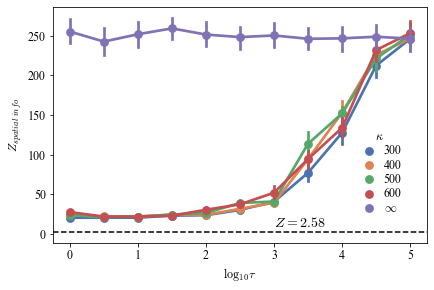

In [80]:
ax = sns.pointplot(data=df_si, x='log tau', y='sinfoz', hue='kappa', ci=95, palette='deep')
ax.axhline(2.58, linestyle='--', c='k')
ax.set_xticks([0, 2, 4, 6, 8, 10])
ax.set_xticklabels([0, 1, 2, 3, 4, 5])
ax.set_ylabel(r'$Z_{spatial\ info}$')
ax.set_xlabel(r'$\log_{10}\tau$')
ax.legend(title=r'$\kappa$', loc=(0.8, 0.1), frameon=False, fontsize=12, labelspacing=0.2, handletextpad=0.2)
ax.text(6, 10, r'$Z = 2.58$', fontsize=14)
plt.tight_layout(pad=0.5)
# plt.savefig('figures/spatialinfo.pdf', transparent=True, dpi=300)

In [34]:
df_si[df_si['kappa'] == r'$\infty$'][['log tau', 'sinfo']].corr()

,log tau,sinfoz
log tau,1.000000,-0.042447
sinfoz,-0.042447,1.000000


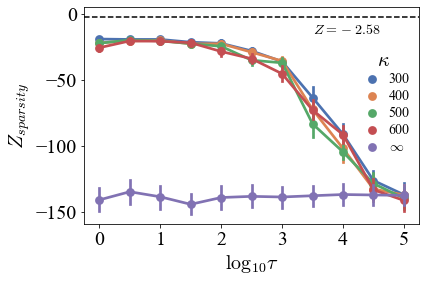

In [49]:
ax = sns.pointplot(data=df_si, x='log tau', y='sidxz', hue='kappa', ci=95, palette='deep')
ax.axhline(-2.58, linestyle='--', c='k')
ax.set_xticks([0, 2, 4, 6, 8, 10])
ax.set_xticklabels([0, 1, 2, 3, 4, 5])
ax.set_ylabel('$Z_{sparsity}$')
ax.set_xlabel(r'$\log_{10}\tau$')
ax.legend(title=r'$\kappa$', loc=(0.8, 0.3), frameon=False, fontsize=14, labelspacing=0.2, handletextpad=0.2)
ax.text(7, -15, r'$Z = -2.58$', fontsize=14)
plt.tight_layout(pad=0.5)
# plt.savefig('figures/sparsity.pdf', transparent=True, dpi=300)

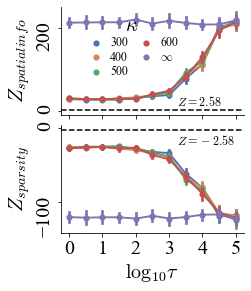

In [5]:
fig, ax = plt.subplots(2, sharex='all')
for i, (c, l) in enumerate(zip(('sinfoz', 'sidxz'), ('$Z_{spatial info}$', '$Z_{sparsity}$'))):
    sns.pointplot(data=df_si, x='log tau', y=c, hue='kappa', ci=95, palette='deep', ax=ax[i], scale=0.7)
    ax[i].axhline((-1)**i * 2.58, linestyle='--', c='k')
    ax[i].set_xticks([0, 2, 4, 6, 8, 10])
    ax[i].set_xticklabels([0, 1, 2, 3, 4, 5])
    ax[i].set_ylabel(l)
    ax[i].tick_params(axis='y', labelrotation=90)
    ax[i].text(6.5, (-1)**i * (13 + 10 * i), r'$Z = %.2f$' % ((-1)**i * 2.58), fontsize=12)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

ax[0].legend(title=r'$\kappa$', ncol=2, loc=(0.1, 0.3), frameon=False, fontsize=12, columnspacing=0.5, labelspacing=0.2, handletextpad=0.2)
ax[0].set_xlabel('')
ax[1].set_xlabel(r'$\log_{10}\tau$')
ax[1].get_legend().remove()
fig.set_size_inches(85*MM, 100*MM)
fig.tight_layout(pad=0.1)
# plt.savefig('figures/sample_si.pdf', transparent=True, dpi=300, pad_inches=0, bbox_inches='tight')

In [35]:
df_si[df_si['kappa'] == r'$\infty$'][['log tau', 'sidxz']].corr()

,log tau,sidxz
log tau,1.000000,0.031027
sidxz,0.031027,1.000000


### (Comparing among neurons)

In [803]:
# ax = sns.boxplot(data=df_si, x='nid', y='sidxz', hue='uncert')
# plt.legend(title='Uncertainty', bbox_to_anchor=(1.01, 1))

In [804]:
# ax = sns.boxplot(data=df_si, x='nid', y='sinfoz', hue='uncert')
# plt.legend(title='Uncertainty', bbox_to_anchor=(1.01, 1))

In [805]:
# sinfo_u_ttest = dict() # t-score at 0, p value at 1
# sidx_u_ttest = dict() # t-score at 0, p value at 1
# for i in range(4):
#     for j in range(i+1, 4):
#         s1 = df_si[(df_si['nid'] == i) & df_si['uncert'].astype('bool')]
#         s2 = df_si[(df_si['nid'] == j) & df_si['uncert'].astype('bool')]
#         sidx_u_ttest[(i, j)] = ttest_ind(s1['sidxz'], s2['sidxz'])
#         sinfo_u_ttest[(i, j)] = ttest_ind(s1['sinfoz'], s2['sinfoz'])
# sinfo_u_ttest, sidx_u_ttest

In [806]:
# sinfo_c_ttest = dict() # t-score at 0, p value at 1
# sidx_c_ttest = dict() # t-score at 0, p value at 1
# for i in range(4):
#     for j in range(i+1, 4):
#         s1 = df_si[(df_si['nid'] == i) & (~df_si['uncert'].astype('bool'))]
#         s2 = df_si[(df_si['nid'] == j) & (~df_si['uncert'].astype('bool'))]
#         sidx_c_ttest[(i, j)] = ttest_ind(s1['sidxz'], s2['sidxz'])
#         sinfo_c_ttest[(i, j)] = ttest_ind(s1['sinfoz'], s2['sinfoz'])
# sinfo_c_ttest, sidx_c_ttest

## $\chi$ Scores

In [7]:
change_ints = (1, 5, 1e1, 5e1, 1e2, 5e2, 1e3, 5e3, 1e4, 5e4, 1e5)
col = ['tid', 'nid', r'$\kappa$', r'$\tau$', 'Score Type', 'Score']
df_chi = pd.DataFrame(index=np.arange(8*4*5*len(change_ints)*3), columns=col)

bins = 40
count = 0
for _, xfname in enumerate(glob.glob('data/x/*.npy')):
    tid = xfname[7]
    x = np.load(xfname)
    T = len(x)
    p, xs = hist3d(x, bins=bins)
    
    for i, change_int in enumerate(change_ints):
        for kappa in (300, 400, 500, 600, 'c'):
            c = 'c' if kappa == 'c' else 'u'
            a = np.load('data/a_%s/%s_%s_%d.npy' % (kappa, c, tid, change_int))
            spikes = np.random.poisson(lam=1/(1 + np.exp(-(a - 0.7) * 30)), size=(T, 4))
            f, _ = hist3d(x, spikes, bins=bins, sigma=1.75)
            ac = autocorr(f, 0.1)
            res = chi_score(ac)
            for j, st in enumerate(('FCC', 'HCP', 'COL')):
                for k in range(4):
                    df_chi.loc[count, 'tid'] = tid
                    df_chi.loc[count, 'nid'] = k
                    df_chi.loc[count, r'$\kappa$'] = r'$\infty$' if kappa == 'c' else kappa
                    df_chi.loc[count, r'$\tau$'] = change_int
                    df_chi.loc[count, 'Score Type'] = r'$\chi_{%s}$' % st
                    df_chi.loc[count, 'Score'] = res[j][k]
                    count += 1
df_chi.loc[:, r'$\log \tau$'] = np.log10(df_chi.loc[:, r'$\tau$'].astype(np.float64))

In [15]:
df_chi.to_csv('data/analysis/chi.csv', index=False)

In [22]:
df_chi = pd.read_csv('data/analysis/chi.csv')

In [6]:
kappas = ('300', '400', '500', '600')
change_ints = (1, 5, 1e1, 5e1, 1e2, 5e2, 1e3, 5e3, 1e4, 5e4, 1e5)
ps_chi = np.zeros((3, len(change_ints), 6))
for t, tau in enumerate(change_ints):
    count = 0
    for i in range(len(kappas)):
        for j in range(i+1, len(kappas)):
            for k, st in enumerate((r'$\chi_{FCC}$', r'$\chi_{HCP}$', r'$\chi_{COL}$')):
                s1 = df_chi[(df_chi[r'$\kappa$'] == kappas[i]) & (df_chi[r'$\tau$'] == tau) & (df_chi['Score Type'] == st)].Score
                s2 = df_chi[(df_chi[r'$\kappa$'] == kappas[j]) & (df_chi[r'$\tau$'] == tau) & (df_chi['Score Type'] == st)].Score
                res = ttest_ind(s1, s2)
                
                ps_chi[k, t, count] = res.pvalue
            count += 1

In [7]:
(ps_chi < 0.01).sum(axis=-1)

array([[2, 0, 0, 0, 3, 1, 0, 0, 0, 1, 1],
       [2, 0, 0, 0, 2, 3, 1, 0, 2, 4, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

In [13]:
std = (
    standard_chi[(standard_chi['Type'] == 'FCC') & (standard_chi['Score Type'] == r'$\chi_{FCC}$')].Score.mean(), 
    standard_chi[(standard_chi['Type'] == 'HCP') & (standard_chi['Score Type'] == r'$\chi_{HCP}$')].Score.mean(), 
    standard_chi[(standard_chi['Type'] == 'COL') & (standard_chi['Score Type'] == r'$\chi_{COL}$')].Score.mean())

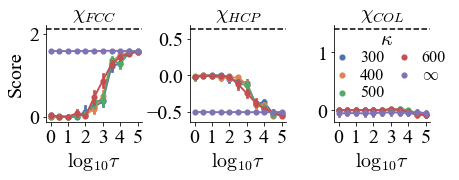

In [14]:
g = sns.catplot(data=df_chi, kind='point', col='Score Type', x=r'$\log \tau$', y='Score', hue=r'$\kappa$', 
                sharey=False, margin_titles=True, aspect=1, height=3, legend=False, palette='deep', scale=0.7)
for i in range(3): # Standard structure chi score
    g.axes[0][i].axhline(std[i], linestyle='--', color='k')
g.set_titles(col_template='{col_name}')
g.set(xticks=[0, 2, 4, 6, 8, 10], xticklabels=[0, 1, 2, 3, 4, 5])
g.set_xlabels(r'$\log_{10}\tau$')
plt.legend(title=r'$\kappa$', ncol=2, loc=(-0.15, 0.15), frameon=False, fontsize=16, columnspacing=0.25, labelspacing=0.1, handletextpad=0.1)
g.fig.set_size_inches(180*MM, 60*MM)
g.tight_layout(pad=0.1)
# g.savefig('figures/sample_chi.pdf', transparent=True, dpi=300, pad_inches=0)

In [17]:
for st in (r'$\chi_{FCC}$', r'$\chi_{HCP}$', r'$\chi_{COL}$'):
    print(df_chi[(df_chi[r'$\kappa$'] == r'$\infty$') & (df_chi['Score Type'] == st)]\
          [[r'$\log \tau$', 'Score']].corr().iloc[0, 1])

-0.006501458857853445
0.02280716846287757
0.005937452501996866


## Modified Radial Autocorrelation

In [17]:
bins = 40
change_ints = (1, 5, 1e1, 5e1, 1e2, 5e2, 1e3, 5e3, 1e4, 5e4, 1e5)
col = ['tid', 'nid', r'$\kappa$', r'$\tau$', 'Radius', 'ac', 'normalized ac']
df_acr = pd.DataFrame(index=np.arange(8*4*5*len(change_ints)*(bins*2-1)//2), columns=col)

count = 0
for _, xfname in enumerate(glob.glob('data/x/*.npy')):
    tid = xfname[7]
    x = np.load(xfname)
    T = len(x)
    p, xs = hist3d(x, bins=bins)
    
    for i, change_int in enumerate(change_ints):
        for kappa in (300, 400, 500, 600, 'c'):
            c = 'c' if kappa == 'c' else 'u'
            a = np.load('data/a_%s/%s_%s_%d.npy' % (kappa, c, tid, change_int))
            spikes = np.random.poisson(lam=1/(1 + np.exp(-(a - 0.7) * 30)), size=(T, 4))
            f, _ = hist3d(x, spikes, bins=bins, sigma=1.75)
            ac = autocorr(f, 0.1)
            for k in range(4):
                res = autocorr_radial3d(ac[..., k], len(ac)//2, method='mean_comp')
                l = len(res)
                df_acr.loc[count:count+l-1, 'tid'] = tid
                df_acr.loc[count:count+l-1, 'nid'] = k
                df_acr.loc[count:count+l-1, r'$\kappa$'] = r'$\infty$' if kappa == 'c' else kappa
                df_acr.loc[count:count+l-1, r'$\tau$'] = change_int
                df_acr.loc[count:count+l-1, 'Radius'] = np.arange(l)
                df_acr.loc[count:count+l-1, 'ac'] = res
                m = res.min()
                df_acr.loc[count:count+l-1, 'normalized ac'] = (res - m) / (res.max() - m)
                count += l
df_acr.dropna(how='all', inplace=True)
df_acr.loc[:, 'ac'] = df_acr['ac'].astype(np.float64)
df_acr.loc[:, 'normalized ac'] = df_acr['normalized ac'].astype(np.float64)
df_acr.loc[:, 'Radius'] = df_acr['Radius'].astype(np.int32)
df_acr.loc[:, r'$\tau$'] = df_acr[r'$\tau$'].astype(np.int32)
df_acr.loc[:, r'$\log \tau$'] = np.log10(df_acr[r'$\tau$'])

In [19]:
df_acr.to_csv('data/analysis/acr.csv', index=False)

In [110]:
df_acr = pd.read_csv('data/analysis/acr.csv')

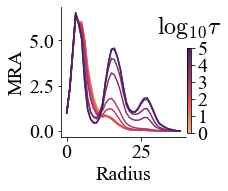

In [18]:
g = sns.FacetGrid(data=df_acr[df_acr[r'$\kappa$'] != r'$\infty$'])
g.map_dataframe(sns.lineplot, x='Radius', y='ac', hue=r'$\log \tau$', palette='flare', ci=None)
g.set_axis_labels('Radius', 'MRA')

# divider = make_axes_locatable(g.axes[0][-1])
# cax = divider.append_axes('right', size='3%', pad=0.05)
# norm = mpl.colors.Normalize(vmin=0, vmax=5)
# plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=sns.color_palette('flare', as_cmap=True)), 
#              cax=cax, orientation='vertical', label=r'$\log_{10} \tau$', ticks=[0, 1, 2, 3, 4, 5])

g.tight_layout(pad=0.1)

cax =  g.fig.add_axes([1, 0.25, 0.02, 0.5])
norm = mpl.colors.Normalize(vmin=0, vmax=5)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=sns.color_palette('flare', as_cmap=True)), 
                    cax=cax, orientation='vertical', ticks=[0, 1, 2, 3, 4, 5])
cbar.ax.set_title(r'$\log_{10} \tau$', y=1.1)

g.fig.set_size_inches(60*MM, 60*MM)
# g.savefig('figures/sample_r3d.pdf', transparent=True, dpi=300, pad_inches=0, bbox_inches='tight')

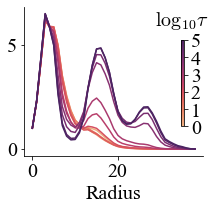

In [136]:
fig, ax = plt.subplots(1, figsize=(3, 3))
sns.lineplot(data=df_acr[df_acr[r'$\kappa$'] != r'$\infty$'], x='Radius', y='ac', hue=r'$\log \tau$', palette='flare', ci=None, ax=ax, legend=False)
ax.set_xlabel('Radius')
ax.set_ylabel('') # ax.set_ylabel('Modified Autocorr.')
ax.set_yticks([0, 5])
ax.set_xticks([0, 20])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# divider = make_axes_locatable(g.axes[0][-1])
# cax = divider.append_axes('right', size='3%', pad=0.05)
# norm = mpl.colors.Normalize(vmin=0, vmax=5)
# plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=sns.color_palette('flare', as_cmap=True)), 
#              cax=cax, orientation='vertical', label=r'$\log_{10} \tau$', ticks=[0, 1, 2, 3, 4, 5])

fig.tight_layout(pad=0.5)

cax =  fig.add_axes([0.85, 0.4, 0.015, 0.4])
norm = mpl.colors.Normalize(vmin=0, vmax=5)
cbar = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=sns.color_palette('flare', as_cmap=True)), 
                    cax=cax, orientation='vertical', ticks=[0, 1, 2, 3, 4, 5])
cbar.ax.set_title(r'$\log_{10} \tau$', y=1.1, fontsize=20)

# fig.savefig('figures/sample_r3d.pdf', transparent=True, dpi=300)

# Samples (Vector)

## Spatial Information and Sparsity Index

In [11]:
change_ints = (1, 5, 1e1, 5e1, 1e2, 5e2, 1e3, 5e3, 1e4, 5e4, 1e5)
col = ['tid', 'nid', 'kappa', 'tau', 'sidx', 'sinfo', 'sidxz', 'sinfoz']
df_lsi = pd.DataFrame(index=np.arange(8*4*5*len(change_ints)), columns=col)

bins = 40
count = 0
for _, xfname in enumerate(glob.glob('data/x/*.npy')):
    tid = xfname[7:15]
    x = np.load(xfname)
    T = len(x)
    p, xs = hist3d(x, bins=bins)
    
    for i, change_int in enumerate(change_ints):
        for kappa in ('300', '400', '500', 'c'):
            c = 'c' if kappa == 'c' else 'u'
            a = np.load('data/linear/a_%s/%s_%s_%d.npy' % (kappa, c, tid, change_int))
            spikes = np.random.poisson(lam=1/(1 + np.exp(-(a - 0.7) * 30)), size=(T, 4))
            f, _ = hist3d(x, spikes, bins=bins, sigma=1.75)
            
            sinfo = spatial_info(p, f)
            sidx = sparsity_idx(p, f)
            
            sinfo_sf, sidx_sf = si_shuffle(p, x, spikes, bins=bins, sigma=1.75)
            
            sinfo_z = (sinfo - sinfo_sf.mean(axis=0)) / sinfo_sf.std(axis=0)
            sidx_z = (sidx - sidx_sf.mean(axis=0)) / sidx_sf.std(axis=0)
            
            for k in range(4):
                df_lsi.loc[count, 'tid'] = tid
                df_lsi.loc[count, 'nid'] = k
                df_lsi.loc[count, 'kappa'] = r'$\infty$' if kappa == 'c' else kappa
                df_lsi.loc[count, 'tau'] = change_int
                df_lsi.loc[count, 'sidx'] = sidx[k]
                df_lsi.loc[count, 'sinfo'] = sinfo[k]
                df_lsi.loc[count, 'sidxz'] = sidx_z[k]
                df_lsi.loc[count, 'sinfoz'] = sinfo_z[k]
                count += 1

In [12]:
df_lsi.loc[:, 'log tau'] = np.log10(df_lsi.loc[:, 'tau'].astype(np.float64))
df_lsi.loc[:, 'log sidx'] = np.log10(df_lsi.loc[:, 'sidx'].astype(np.float64))
df_lsi.loc[:, 'log sinfo'] = np.log10(df_lsi.loc[:, 'sinfo'].astype(np.float64))
df_lsi.loc[:, 'log sidxz'] = np.log10(-df_lsi.loc[:, 'sidxz'].astype(np.float64))
df_lsi.loc[:, 'log sinfoz'] = np.log10(df_lsi.loc[:, 'sinfoz'].astype(np.float64))

/home/zigon/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
# df_lsi.to_csv('data/analysis/lsi.csv', index=False)

In [85]:
df_lsi = pd.read_csv('data/analysis/lsi.csv')

In [86]:
kappas = ('300', '400', '500')
change_ints = (1, 5, 1e1, 5e1, 1e2, 5e2, 1e3, 5e3, 1e4, 5e4, 1e5)
ps_lsi = np.zeros((2, len(change_ints), 6))
for t, tau in enumerate(change_ints):
    count = 0
    for i in range(len(kappas)):
        for j in range(i+1, len(kappas)):
            res_sindx = ttest_ind(df_lsi[(df_lsi['kappa'] == kappas[i]) & (df_lsi['tau'] == tau)].sidxz, 
                                  df_lsi[(df_lsi['kappa'] == kappas[j]) & (df_lsi['tau'] == tau)].sidxz)
            
            res_sinfo = ttest_ind(df_lsi[(df_lsi['kappa'] == kappas[i]) & (df_lsi['tau'] == tau)].sinfoz, 
                                  df_lsi[(df_lsi['kappa'] == kappas[j]) & (df_lsi['tau'] == tau)].sinfoz)
            
            ps_lsi[0, t, count] = res_sinfo.pvalue
            ps_lsi[1, t, count] = res_sindx.pvalue
            count += 1

In [87]:
((ps_lsi < 0.05) & (ps_lsi > 0)).sum(axis=-1)

array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

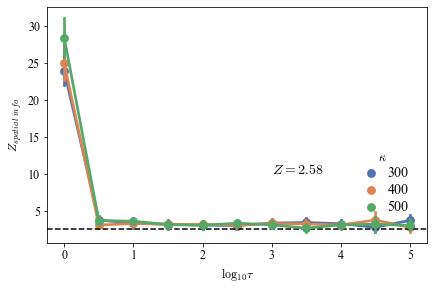

In [88]:
ax = sns.pointplot(data=df_lsi[df_lsi['kappa'] != r'$\infty$'], x='log tau', y='sinfoz', hue='kappa', ci=95, palette='deep')
ax.axhline(2.58, linestyle='--', c='k')
ax.set_xticks([0, 2, 4, 6, 8, 10])
ax.set_xticklabels([0, 1, 2, 3, 4, 5])
ax.set_ylabel(r'$Z_{spatial\ info}$')
ax.set_xlabel(r'$\log_{10}\tau$')
ax.legend(title=r'$\kappa$', loc=(0.8, 0.1), frameon=False, fontsize=14, labelspacing=0.2, handletextpad=0.2)
ax.text(6, 10, r'$Z = 2.58$', fontsize=14)
plt.tight_layout(pad=0.5)
# plt.savefig('figures/spatialinfo.pdf', transparent=True, dpi=300)

In [17]:
df_lsi[df_lsi['kappa'] == r'$\infty$'][['log tau', 'sinfo']].corr()

,log tau
log tau,1.0


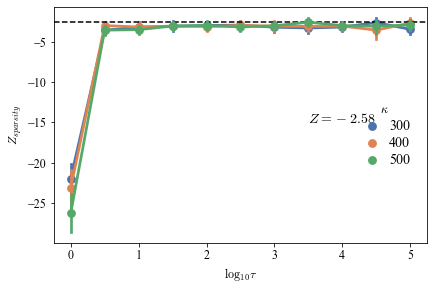

In [89]:
ax = sns.pointplot(data=df_lsi[df_lsi['kappa'] != r'$\infty$'], x='log tau', y='sidxz', hue='kappa', ci=95, palette='deep')
ax.axhline(-2.58, linestyle='--', c='k')
ax.set_xticks([0, 2, 4, 6, 8, 10])
ax.set_xticklabels([0, 1, 2, 3, 4, 5])
ax.set_ylabel('$Z_{sparsity}$')
ax.set_xlabel(r'$\log_{10}\tau$')
ax.legend(title=r'$\kappa$', loc=(0.8, 0.3), frameon=False, fontsize=14, labelspacing=0.2, handletextpad=0.2)
ax.text(7, -15, r'$Z = -2.58$', fontsize=14)
plt.tight_layout(pad=0.5)
# plt.savefig('figures/sparsity.pdf', transparent=True, dpi=300)

In [19]:
df_lsi[df_lsi['kappa'] == r'$\infty$'][['log tau', 'sidxz']].corr()

,log tau
log tau,1.0


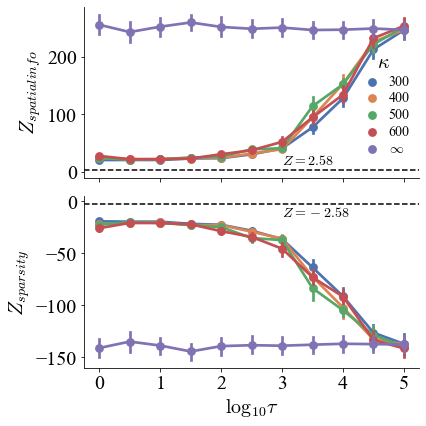

In [83]:
fig, ax = plt.subplots(2, figsize=(6, 6), sharex='all')
for i, (c, l) in enumerate(zip(('sinfoz', 'sidxz'), ('$Z_{spatial info}$', '$Z_{sparsity}$'))):
    sns.pointplot(data=df_lsi, x='log tau', y=c, hue='kappa', ci=95, palette='deep', ax=ax[i])
    ax[i].axhline((-1)**i * 2.58, linestyle='--', c='k')
    ax[i].set_xticks([0, 2, 4, 6, 8, 10])
    ax[i].set_xticklabels([0, 1, 2, 3, 4, 5])
    ax[i].set_ylabel(l)
    ax[i].text(6, (-1)**i * (13 + 2 * i), r'$Z = %.2f$' % ((-1)**i * 2.58), fontsize=14)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

ax[0].legend(title=r'$\kappa$', loc=(0.8, 0.1), frameon=False, fontsize=14, labelspacing=0.2, handletextpad=0.2)
ax[0].set_xlabel('')
ax[1].set_xlabel(r'$\log_{10}\tau$')
ax[1].get_legend().remove()
fig.tight_layout(pad=0.5)
# plt.savefig('figures/sample_si.pdf', transparent=True, dpi=300)